In [1]:
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

In [2]:
df15 = pd.read_csv("../Dataset/01-03-2018.csv", low_memory = False)

In [3]:
df15 = df15.drop([0,1])

In [4]:
df15

,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1812348,0,1812348,1812348,56700000,6010057.622,61000000,52500000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,61000000,0,61000000,61000000
4,0,0,0,0,0,0,0,0,0,0,...,4,8,3530939,0,3530939,3530939,19200000,12500000,32600000,7999725
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,61000000,0,61000000,61000000
6,0,0,0,0,0,0,0,0,0,0,...,0,0,999909,0,999909,999909,61000000,0,61000000,61000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
328179,0,0,0,0,0,0,0,1,0,0,...,0,20,0,0,0,0,0,0,0,0
328180,0,0,0,0,0,0,0,1,0,0,...,5,20,0,0,0,0,0,0,0,0
328181,0,0,0,0,0,0,1,1,0,0,...,7,20,0,0,0,0,0,0,0,0


In [5]:
df16Aux = pd.read_csv("../Dataset/23-02-2018.csv", low_memory = False)

In [6]:
df16Aux = df16Aux.drop([0,1])

In [7]:
df16Aux

,Dst Port,Fwd PSH Flags,Protocol,Bwd PSH Flags,Flow Duration,Fwd URG Flags,Tot Fwd Pkts,Bwd URG Flags,Tot Bwd Pkts,FIN Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2,22.0,0,6.0,0,1532698.0,0,11.0,0,11.0,0,...,7.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,500.0,0,17.0,0,117573855.0,0,3.0,0,0.0,0,...,2.0,8.0,0.0,0.0,0.0,0.0,58786927.5,23753242.0093831,75583006.0,41990849.0
4,500.0,0,17.0,0,117573848.0,0,3.0,0,0.0,0,...,2.0,8.0,0.0,0.0,0.0,0.0,58786924.0,23753248.3733442,75583007.0,41990841.0
5,22.0,0,6.0,0,1745392.0,0,11.0,0,11.0,0,...,7.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,500.0,0,17.0,0,89483474.0,0,6.0,0,0.0,0,...,5.0,8.0,4000364.0,0.0,4000364.0,4000364.0,21370777.5,15280917.4014001,41989576.0,7200485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042864,54116.0,0,6.0,0,85992425.0,0,2.0,0,0.0,0,...,0.0,20.0,0.0,0.0,0.0,0.0,85992425.0,0.0,85992425.0,85992425.0
1042865,33914.0,0,6.0,0,132.0,0,2.0,0,0.0,0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1042866,53.0,0,17.0,0,79134.0,0,1.0,0,1.0,0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1042867,3389.0,0,6.0,0,10053785.0,0,11.0,0,12.0,0,...,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
listOrd = df15.columns.tolist()

In [9]:
df16 = pd.DataFrame()
for colu in listOrd:
    df16[colu] = df16Aux[colu]

In [10]:
df16

,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2,0,0,0,0,0,0,0,1,0,0,...,7.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,2.0,8.0,0.0,0.0,0.0,0.0,58786927.5,23753242.0093831,75583006.0,41990849.0
4,0,0,0,0,0,0,0,0,0,0,...,2.0,8.0,0.0,0.0,0.0,0.0,58786924.0,23753248.3733442,75583007.0,41990841.0
5,0,0,0,0,0,0,0,1,0,0,...,7.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0,0,0,0,0,0,0,0,0,...,5.0,8.0,4000364.0,0.0,4000364.0,4000364.0,21370777.5,15280917.4014001,41989576.0,7200485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042864,0,0,0,0,0,0,0,0,1,0,...,0.0,20.0,0.0,0.0,0.0,0.0,85992425.0,0.0,85992425.0,85992425.0
1042865,0,0,0,0,0,0,0,0,1,0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1042866,0,0,0,0,0,0,0,0,0,0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1042867,0,0,0,0,0,0,1,1,0,0,...,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df16Aux = None

In [12]:
input_label15 = np.array(df15.loc[:, df15.columns != "Label"]).astype(np.float)

In [13]:
output_label15 = np.array(df15["Label"])

In [14]:
out = []
for o in output_label15:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label15 = out

In [15]:
input_label16 = np.array(df16.loc[:, df16.columns != "Label"]).astype(np.float)

In [16]:
output_label16 = np.array(df16["Label"])

In [17]:
out = []
for o in output_label16:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label16 = out

In [18]:
dfAE = pd.concat([df15, df16])

In [19]:
input_labelAE = np.array(dfAE.loc[:, dfAE.columns != "Label"]).astype(np.float)

In [20]:
output_labelAE = np.array(dfAE["Label"])

In [21]:
out = []
for o in output_labelAE:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_labelAE = out

In [22]:
dfAE = None
df15 = None
df16 = None

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_labelAE)
input_label15 = scaler.transform(input_label15)
input_label16 = scaler.transform(input_label16)
input_labelAE = scaler.transform(input_labelAE)

In [24]:
input_labelAE, output_labelAE = shuffle(input_labelAE, output_labelAE)
input_label15, output_label15 = shuffle(input_label15, output_label15)
input_label16, output_label16 = shuffle(input_label16, output_label16)

## AutoEncoder

In [25]:
inp_train,inp_test,out_train,out_test = train_test_split(input_labelAE, input_labelAE, test_size=0.2)

In [26]:
input_model = keras.layers.Input(shape = (78,))
enc = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(input_model)
enc = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
enc = keras.layers.Dense(units = 18, activation = "relu")(enc)
dec = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
dec = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(dec)
dec = keras.layers.Dense(units = 78, activation = "relu", use_bias = True)(dec)
auto_encoder = keras.Model(input_model, dec)

In [27]:
encoder = keras.Model(input_model, enc)
decoder_input = keras.layers.Input(shape = (18,))
decoder_layer = auto_encoder.layers[-3](decoder_input)
decoder_layer = auto_encoder.layers[-2](decoder_layer)
decoder_layer = auto_encoder.layers[-1](decoder_layer)
decoder = keras.Model(decoder_input, decoder_layer)

In [28]:
auto_encoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00025), loss = "mean_squared_error", metrics = ['accuracy'])

In [29]:
train = auto_encoder.fit(x = np.array(inp_train), y = np.array(out_train),validation_split= 0.1, epochs = 10, verbose = 1, shuffle = True)

Epoch 1/10
30849/30849 [==============================] - 34s 1ms/step - loss: 0.0109 - accuracy: 0.5498 - val_loss: 0.0086 - val_accuracy: 0.6010TA: 21s - loss: 0.0132 - accura - ETA: 21s - loss: 0.0130 - accur
Epoch 2/10
30849/30849 [==============================] - 34s 1ms/step - loss: 0.0086 - accuracy: 0.5822 - val_loss: 0.0086 - val_accuracy: 0.5708
Epoch 3/10
30849/30849 [==============================] - 33s 1ms/step - loss: 0.0086 - accuracy: 0.5830 - val_loss: 0.0086 - val_accuracy: 0.5728loss: 0.0086 -  - ETA: 9s - loss: 0.0086 - accuracy: 0. -
Epoch 4/10
30849/30849 [==============================] - 34s 1ms/step - loss: 0.0086 - accuracy: 0.5833 - val_loss: 0.0086 - val_accuracy: 0.5661
Epoch 5/10
30849/30849 [==============================] - 33s 1ms/step - loss: 0.0086 - accuracy: 0.5837 - val_loss: 0.0086 - val_accuracy: 0.6008 6s - loss: 0.008 - ETA: 6s - loss: 0.0086 - accuracy:  - ETA: 5s - loss: 0.0 - ETA: 5s - loss: 0.0086 - accuracy - ETA: 5s - loss: 0.0086 - ac 

In [30]:
predict = auto_encoder.predict(inp_test)

In [31]:
losses = keras.losses.mean_squared_error(out_test, predict).numpy()

In [32]:
total = 0
for loss in losses:
    total += loss
print(total / len(losses))

0.008619441408945992


In [33]:
input_labelAE = None
input_label15 = encoder.predict(input_label15).reshape(len(input_label15), 18, 1)
input_label16 = encoder.predict(input_label16).reshape(len(input_label16), 18, 1)

## Classificador

In [34]:
model = keras.Sequential([
        keras.layers.Conv1D(filters = 16, input_shape = (18,1), kernel_size = 3, padding = "same", activation = "relu", use_bias = True),
        keras.layers.MaxPool1D(pool_size = 3),
        keras.layers.Conv1D(filters = 8, kernel_size = 3, padding = "same", activation = "relu", use_bias = True),
        keras.layers.MaxPool1D(pool_size = 3),
        keras.layers.Flatten(),
        keras.layers.Dense(units = 2, activation = "softmax")
    ])

In [35]:
model.compile(optimizer= keras.optimizers.Adam(learning_rate= 0.00025), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [36]:
model.fit(x = np.array(input_label15), y = np.array(output_label15), validation_split= 0.1, epochs = 10, shuffle = True,verbose = 1)

Epoch 1/10
9231/9231 [==============================] - 13s 1ms/step - loss: 0.5780 - accuracy: 0.7233 - val_loss: 0.5546 - val_accuracy: 0.7608
Epoch 2/10
9231/9231 [==============================] - 12s 1ms/step - loss: 0.5529 - accuracy: 0.7600 - val_loss: 0.5452 - val_accuracy: 0.7643
Epoch 3/10
9231/9231 [==============================] - 12s 1ms/step - loss: 0.5451 - accuracy: 0.7627 - val_loss: 0.5402 - val_accuracy: 0.7657
Epoch 4/10
9231/9231 [==============================] - 12s 1ms/step - loss: 0.5398 - accuracy: 0.7642 - val_loss: 0.5346 - val_accuracy: 0.7661
Epoch 5/10
9231/9231 [==============================] - 12s 1ms/step - loss: 0.5355 - accuracy: 0.7643 - val_loss: 0.5321 - val_accuracy: 0.7662
Epoch 6/10
9231/9231 [==============================] - 12s 1ms/step - loss: 0.5340 - accuracy: 0.7629 - val_loss: 0.5286 - val_accuracy: 0.7707
Epoch 7/10
9231/9231 [==============================] - 12s 1ms/step - loss: 0.5310 - accuracy: 0.7647 - val_loss: 0.5253 - val_ac

In [37]:
res = [np.argmax(resu) for resu in model.predict(input_label16)]

In [38]:
cm = confusion_matrix(y_true = np.array(output_label16).reshape(len(output_label16)), y_pred = np.array(res))

In [39]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1037356    4945]
 [    566       0]]


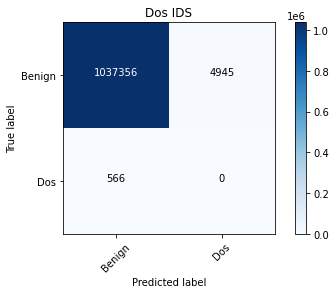

In [40]:
labels = ["Benign", "Dos"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Dos IDS")

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [42]:
output_label16 = np.array(output_label16).reshape(len(output_label16))
res = np.array(res)
fpr, tpr, _ = roc_curve(output_label16,  res)
auc = roc_auc_score(output_label16, res)

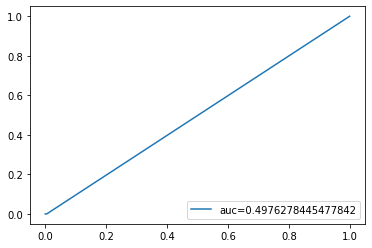

In [43]:
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.show()